### Importing libraries and dataset

In [1]:
#importing necessary libraries to handle and visualize data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#for building, training and validating the model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [3]:
df_train = pd.read_csv('car_data.csv')

### EDA

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [5]:
df_train.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [6]:
df_train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#for categorical data
df_train.describe(include=['object']).transpose()

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


In [8]:
#for numerical features
df_train.describe(include=['int64','float64']).transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [9]:
df_train['Owner'] = df_train['Owner'].astype(str)

In [10]:
df_train.corr()

,Year,Selling_Price,Present_Price,Kms_Driven
Year,1.000000,0.236141,-0.047584,-0.524342
Selling_Price,0.236141,1.000000,0.878983,0.029187
Present_Price,-0.047584,0.878983,1.000000,0.203647
Kms_Driven,-0.524342,0.029187,0.203647,1.000000


In [11]:
target = df_train['Selling_Price']
x_data = df_train.drop(['Selling_Price'],axis=1)

### Data pre processing

In [12]:
# save all categorical columns in list
categorical_columns = [col for col in x_data.columns.values if x_data[col].dtype == 'object']

# dataframe with categorical features
x_cat = x_data[categorical_columns]
# dataframe with numerical features
x_num = x_data.drop(categorical_columns, axis=1)

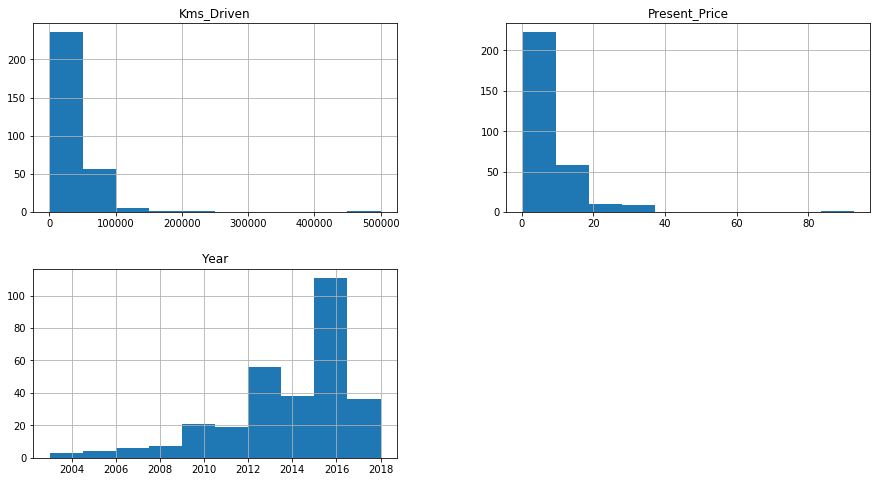

In [13]:
x_num.hist(figsize=(15,8))
plt.show()

In [14]:
x_num.skew()

Year            -1.246189
Present_Price    4.083150
Kms_Driven       6.436013
dtype: float64

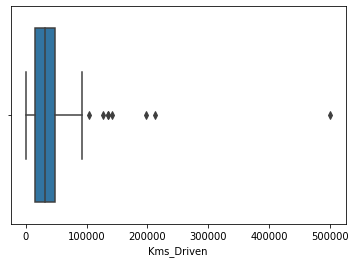

In [15]:
sns.boxplot(x_num['Kms_Driven'])

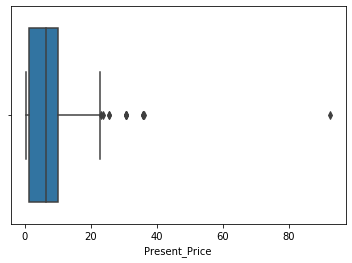

In [16]:
sns.boxplot(x_num['Present_Price'])

In [17]:
#func to remove outliers
def rm_out(df):
    for i,val in df.iteritems():
        u_thres = df[i].quantile(q=0.75)+1.5*(df[i].quantile(q=0.75)-df[i].quantile(q=0.25))
        l_thres = df[i].quantile(q=0.25)-1.5*(df[i].quantile(q=0.75)-df[i].quantile(q=0.25))
        df[i] = df[(df[i]>=l_thres) & (df[i]<=u_thres)][i]

In [18]:
x_num1 = x_num.copy()

In [19]:
#removing outliers
rm_out(x_num1)

In [20]:
x_num1.head()

,Year,Present_Price,Kms_Driven
0,2014.0,5.59,27000.0
1,2013.0,9.54,43000.0
2,2017.0,9.85,6900.0
3,2011.0,4.15,5200.0
4,2014.0,6.87,42450.0


In [21]:
x_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 3 columns):
Year             294 non-null float64
Present_Price    287 non-null float64
Kms_Driven       293 non-null float64
dtypes: float64(3)
memory usage: 7.1 KB


In [22]:
#fill na values
x_num1['Year'] = x_num1['Year'].fillna(x_num1['Year'].mode().iloc[0])
x_num1['Present_Price'] = x_num1['Present_Price'].fillna(x_num1['Present_Price'].mean())
x_num1['Kms_Driven'] = x_num1['Kms_Driven'].fillna(x_num1['Kms_Driven'].mean())

In [23]:
#normalizing treated and non treated numerical data
x_num = (x_num-x_num.mean()/x_num.std())
x_num1 = (x_num1-x_num1.mean()/x_num1.std())

In [24]:
#checking for both the skewness
x_num.skew()

Year            -1.246189
Present_Price    4.083150
Kms_Driven       6.436013
dtype: float64

In [25]:
x_num1.skew()

Year            -0.960353
Present_Price    0.833819
Kms_Driven       0.563956
dtype: float64

In [26]:
#dummy coding for categorical values
x_cat_dummies = pd.get_dummies(x_cat,drop_first=True)

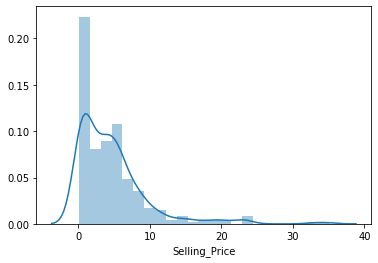

In [27]:
sns.distplot(target)

In [28]:
target.skew()

2.493422417797524

In [29]:
target1 = pd.DataFrame(target)
rm_out(target1)

In [30]:
target1['Selling_Price']=target1['Selling_Price'].fillna(target1['Selling_Price'].mean())

In [31]:
target1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 1 columns):
Selling_Price    301 non-null float64
dtypes: float64(1)
memory usage: 2.4 KB


In [32]:
target1.skew()

Selling_Price    0.750712
dtype: float64

### Model 1 with non treated numerical value

In [33]:
train = pd.concat([x_num,x_cat_dummies],axis = 1)

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(train,target,test_size=0.30,random_state=2)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)

X_train (210, 106)
X_test (91, 106)
Y_train (210,)
Y_test (91,)


In [35]:
#Building Linear Regression model using OLS
model1 = sm.OLS(Y_train,X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              30.90
Date:                Wed, 11 Dec 2019   Prob (F-statistic):                    1.95e-56
Time:                        11:20:30   Log-Likelihood:                         -396.59
No. Observations:                 210   AIC:                                      961.2
Df Residuals:                     126   BIC:                                      1242.
Df Model:                          84                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Year                                   0.0014      0.003      0.420      0.675      -0.005       0.008
Present_Price                          0.8185      0.100      8.212      0.000       0.621       1.016
Kms_Driven                         -2.046e-05      5e-06     -4.094      0.000   -3.03e-05   -1.06e-05
Car_Name_Activa 3g                     3.5728      2.721      1.313      0.192      -1.812       8.957
Car_Name_Activa 4g                    -1.4210      3.121     -0.455      0.650      -7.598       4.756
Car_Name_Bajaj  ct 100                -0.6870      2.979     -0.231      0.818      -6.583       5.209
Car_Name_Bajaj Avenger 150          1.091e-11   2.76e-11      0.396      0.693   -4.36e-11    6.54e-11
Car_Name_Bajaj Avenger 150 street  -4.545e-12   1.06e-11     -0.429      0.669   -2.55e-11    1.64e-11
Car_Name_Bajaj Avenger 220            -1.2799      3.005     -0.426      0.671      -7.227       4.667
Car_Name_Bajaj Avenger 220 dtsi       -1.1591      2.990     -0.388      0.699      -7.076       4.757
Car_Name_Bajaj Avenger Street 220   1.838e-11   5.86e-11      0.314      0.754   -9.76e-11    1.34e-10
Car_Name_Bajaj Discover 100        -9.084e-13   2.86e-11     -0.032      0.975   -5.75e-11    5.56e-11
Car_Name_Bajaj Discover 125           -0.4507      2.819     -0.160      0.873      -6.029       5.127
Car_Name_Bajaj Dominar 400            -1.1590      3.003     -0.386      0.700      -7.101       4.783
Car_Name_Bajaj Pulsar  NS 200         -1.0186      2.981     -0.342      0.733      -6.917       4.880
Car_Name_Bajaj Pulsar 135 LS       -2.435e-11   3.26e-11     -0.746      0.457   -8.89e-11    4.02e-11
Car_Name_Bajaj Pulsar 150             -0.5519      2.375     -0.232      0.817      -5.252       4.148
Car_Name_Bajaj Pulsar 220 F           -0.8669      2.589     -0.335      0.738      -5.990       4.256
Car_Name_Bajaj Pulsar NS 200          -1.3805      2.988     -0.462      0.645      -7.293       4.532
Car_Name_Bajaj Pulsar RS200           -1.1872      2.999     -0.396      0.693      -7.123       4.748
Car_Name_Hero  CBZ Xtreme           1.963e-11   3.28e-11      0.599      0.550   -4.53e-11    8.45e-11
Car_Name_Hero  Ignitor Disc           -0.6161      3.180     -0.194      0.847      -6.909       5.677
Car_Name_Hero Extreme                 -1.0461      2.610     -0.401      0.689      -6.210       4.118
Car_Name_Hero Glamour                 -1.1666      2.989     -0.390      0.697      -7.082       4.749
Car_Name_Hero Honda CBZ extreme    -8.321e-12   1.27e-11     -0.657      0.512   -3.34e-11    1.67e-11
Car_Name_Hero Honda Passion Pro       -0.2068      2.957     -0.070      0.944      -6.058       5.6

In [36]:
y_pred = model1.predict(X_test)

In [37]:
#calculating mean squared error
mse = mean_squared_error(Y_test,y_pred)
print("Mean squared error",mse)

Mean squared error 2.8578612204167313


### Model with treated values for target and train variable

In [38]:
train1 = pd.concat([x_num1,x_cat_dummies],axis = 1)

In [47]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(train1,target1,test_size=0.30,random_state=1)
print("X_train1",X_train1.shape)
print("X_test1",X_test1.shape)
print("Y_train1",Y_train1.shape)
print("Y_test1",Y_test1.shape)

X_train1 (210, 106)
X_test1 (91, 106)
Y_train1 (210, 1)
Y_test1 (91, 1)


In [48]:
#Building Linear Regression model using OLS
model2 = sm.OLS(Y_train1,X_train1).fit()
model2.summary()

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\No_ob0dy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\No_ob0dy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\No_ob0dy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              24.83
Date:                Wed, 11 Dec 2019   Prob (F-statistic):                    9.61e-51
Time:                        11:20:56   Log-Likelihood:                         -320.00
No. Observations:                 210   AIC:                                      810.0
Df Residuals:                     125   BIC:                                      1094.
Df Model:                          85                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Year                                   0.0006      0.002      0.301      0.764      -0.003       0.005
Present_Price                          0.3377      0.062      5.446      0.000       0.215       0.460
Kms_Driven                         -1.984e-05   6.46e-06     -3.073      0.003   -3.26e-05   -7.06e-06
Car_Name_Activa 3g                     0.4517      1.819      0.248      0.804      -3.149       4.052
Car_Name_Activa 4g                     0.2422      2.096      0.116      0.908      -3.905       4.389
Car_Name_Bajaj  ct 100                 0.4390      2.039      0.215      0.830      -3.597       4.475
Car_Name_Bajaj Avenger 150           5.62e-11   1.42e-10      0.397      0.692   -2.24e-10    3.36e-10
Car_Name_Bajaj Avenger 150 street      0.3987      2.040      0.195      0.845      -3.638       4.435
Car_Name_Bajaj Avenger 220             0.1787      1.776      0.101      0.920      -3.337       3.694
Car_Name_Bajaj Avenger 220 dtsi    -3.633e-11   9.27e-11     -0.392      0.696    -2.2e-10    1.47e-10
Car_Name_Bajaj Avenger Street 220      0.2805      2.034      0.138      0.891      -3.746       4.307
Car_Name_Bajaj Discover 100            0.2018      2.038      0.099      0.921      -3.831       4.235
Car_Name_Bajaj Discover 125            0.7931      2.203      0.360      0.719      -3.567       5.153
Car_Name_Bajaj Dominar 400             0.6048      2.046      0.296      0.768      -3.445       4.654
Car_Name_Bajaj Pulsar  NS 200          0.4350      2.037      0.214      0.831      -3.596       4.465
Car_Name_Bajaj Pulsar 135 LS        1.042e-11   2.63e-11      0.396      0.693   -4.16e-11    6.25e-11
Car_Name_Bajaj Pulsar 150              0.7492      1.624      0.461      0.645      -2.464       3.962
Car_Name_Bajaj Pulsar 220 F            0.5560      1.763      0.315      0.753      -2.933       4.045
Car_Name_Bajaj Pulsar NS 200           0.3028      1.662      0.182      0.856      -2.986       3.591
Car_Name_Bajaj Pulsar RS200         -5.36e-12   1.41e-11     -0.381      0.704   -3.32e-11    2.25e-11
Car_Name_Hero  CBZ Xtreme              0.6033      2.036      0.296      0.767      -3.426       4.632
Car_Name_Hero  Ignitor Disc        -6.754e-12    2.8e-11     -0.241      0.810   -6.23e-11    4.87e-11
Car_Name_Hero Extreme                  0.3153      1.766      0.179      0.859      -3.180       3.811
Car_Name_Hero Glamour                  0.0885      2.038      0.043      0.965      -3.945       4.122
Car_Name_Hero Honda CBZ extreme        1.2775      2.055      0.622      0.535      -2.789       5.344
Car_Name_Hero Honda Passion Pro     4.846e-12   1.01e-11      0.480      0.632   -1.51e-11    2.48e-

In [49]:
y_pred1 = model2.predict(X_test1)

In [50]:
#calculating mean squared error
mse1 = mean_squared_error(Y_test1,y_pred1)
print("Mean squared error",mse1)

Mean squared error 1.0370913497119645
